<a href="https://colab.research.google.com/github/colmo786/infovis/blob/main/Spotipy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#@title
%%html
<span style="font-family:Arial Black; font-size:300%;color:RoyalBlue">Spotify</span><br>
<span style="font-family:Arial Black; font-size:200%;color:CornflowerBlue">Data Mining</span>

# Load Packages

In [1]:
import pandas as pd
import re
import io
from google.colab import files

In [2]:
import warnings
warnings.filterwarnings("ignore", category=Warning)
# Seteos de Pandas para ver mejor la info. https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html
# In max_columns and max_rows ‘None’ value means unlimited.
pd.set_option('display.max_rows', 100)
# Conviene setear min_rows también porque cuando se superan las max_rows, sólo muestra la cantidad indicada en min_rows.
pd.set_option('display.min_rows', 10)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.display.max_colwidth = 100
pd.options.display.float_format = '{:.1f}'.format

To import a library that's not in Colaboratory by default, you can use `!pip install` or `!apt-get install`.

In [3]:
import json

In [10]:
import matplotlib.pyplot as plt

In [26]:
import altair as alt

In [34]:
from wordcloud import WordCloud, ImageColorGenerator

In [41]:
import seaborn as sns
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

In [50]:
import plotly.graph_objects as go

# Upload Data from local folder
Opens a window to select one or a bunch of files. Then you can load to a dataframe by using io.StringIO(uploaded['name_of_file.csv'].decode('utf-8'), where Participants.csv is the name of the file.

In [4]:
uploaded = files.upload()

Saving colmo-ar.csv to colmo-ar.csv


In [5]:
df_playlists = pd.read_csv(io.StringIO(uploaded['colmo-ar.csv'].decode('utf-8')))
df_playlists.head()

,Unnamed: 0,playlist_id,playlist_name,track_qty,owner,track_id,track_name,duration,popularity,artist,album,album_release_date,album_image,added_at,acousticness,danceability,energy,instrumentalness,liveness,loudness,tempo,key
0,0,4tMZamkzAlFJOcvyQ2egml,2022.05 Disco,38,Carla Olmo,1ot6jEe4w4hYnsOPjd3xKQ,I'm So Excited,3.8,69,The Pointer Sisters,So Excited! (Expanded Edition),1982-02-01,https://i.scdn.co/image/ab67616d0000b2734650ca0a8f88129d4667acc5,2022-05-06T23:09:31Z,0.1,0.6,0.9,0.0,0.4,-5.8,184,F
1,1,4tMZamkzAlFJOcvyQ2egml,2022.05 Disco,38,Carla Olmo,1qEHgdFqUxFebMPk8s2HLY,I Don't Feel Like Dancin' - Radio Edit,4.1,62,Scissor Sisters,I Don't Feel Like Dancin',2006-01-01,https://i.scdn.co/image/ab67616d0000b273d0a50cacfb47854fa416cd6c,2022-05-06T23:12:33Z,0.0,0.7,0.9,0.0,0.1,-3.4,108,G
2,2,4tMZamkzAlFJOcvyQ2egml,2022.05 Disco,38,Carla Olmo,3SnGymj6ijE2iuUfWxLo1q,I'm Coming Out,5.4,68,Diana Ross,Diana,1980-05-22,https://i.scdn.co/image/ab67616d0000b273abc5193decc1a2984a93f31e,2022-05-06T23:11:25Z,0.2,0.7,0.8,0.4,0.1,-9.2,110,F
3,3,4tMZamkzAlFJOcvyQ2egml,2022.05 Disco,38,Carla Olmo,3koCCeSaVUyrRo3N2gHrd8,Let's Groove,5.7,77,"Earth, Wind & Fire",Raise!,1981-11-14,https://i.scdn.co/image/ab67616d0000b273b30c8b93cef6fa26f8a7f17a,2022-05-06T23:13:20Z,0.1,0.9,0.6,0.0,0.1,-8.7,125,B
4,4,4tMZamkzAlFJOcvyQ2egml,2022.05 Disco,38,Carla Olmo,7s3FSodLpnKMzeMj17G5d0,That's the Way (I Like It),5.1,48,KC & The Sunshine Band,The TK Years,2009-03-09,https://i.scdn.co/image/ab67616d0000b273ceed1ca675cd1821644a3bf4,2022-05-06T23:14:11Z,0.1,0.7,0.9,0.0,0.3,-6.9,109,F


# EDA and Data Transformation

In [6]:
df_pl = df_playlists.copy()

In [7]:
# There is a row with error, I drop it:
df_pl.album_release_date.min()
df_pl[df_pl.album_release_date=='0000'] #--> index=2031
df_pl.drop([2031], inplace=True)

In [8]:
df_pl.drop(columns=['Unnamed: 0'], inplace=True)
# Now you can change the type of release_date to timestamp:
df_pl.album_release_date = df_pl.album_release_date.astype(str)
df_pl.album_release_date = pd.to_datetime(df_pl.album_release_date, format='%Y-%m-%d %H:%M:%S')
df_pl.added_at = df_pl.added_at.astype(str)
df_pl.added_at = pd.to_datetime(df_pl.added_at, format='%Y-%m-%dT%H:%M:%SZ')
df_pl.dtypes

playlist_id                   object
playlist_name                 object
track_qty                      int64
owner                         object
track_id                      object
track_name                    object
duration                     float64
popularity                     int64
artist                        object
album                         object
album_release_date    datetime64[ns]
album_image                   object
added_at              datetime64[ns]
acousticness                 float64
danceability                 float64
energy                       float64
instrumentalness             float64
liveness                     float64
loudness                     float64
tempo                          int64
key                           object
dtype: object

In [9]:
# Add playlist created date:
df_gb = df_pl.groupby(['playlist_id'], as_index=False).agg(added_at=('added_at', 'min'))
df_pl = df_pl.merge(right=df_gb, how='inner', on='playlist_id')
df_pl.rename(columns={'added_at_y': 'playlist_date'}, inplace=True)
df_pl.head()

,playlist_id,playlist_name,track_qty,owner,track_id,track_name,duration,popularity,artist,album,album_release_date,album_image,added_at_x,acousticness,danceability,energy,instrumentalness,liveness,loudness,tempo,key,playlist_date
0,4tMZamkzAlFJOcvyQ2egml,2022.05 Disco,38,Carla Olmo,1ot6jEe4w4hYnsOPjd3xKQ,I'm So Excited,3.8,69,The Pointer Sisters,So Excited! (Expanded Edition),1982-02-01,https://i.scdn.co/image/ab67616d0000b2734650ca0a8f88129d4667acc5,2022-05-06 23:09:31,0.1,0.6,0.9,0.0,0.4,-5.8,184,F,2022-05-06 23:09:31
1,4tMZamkzAlFJOcvyQ2egml,2022.05 Disco,38,Carla Olmo,1qEHgdFqUxFebMPk8s2HLY,I Don't Feel Like Dancin' - Radio Edit,4.1,62,Scissor Sisters,I Don't Feel Like Dancin',2006-01-01,https://i.scdn.co/image/ab67616d0000b273d0a50cacfb47854fa416cd6c,2022-05-06 23:12:33,0.0,0.7,0.9,0.0,0.1,-3.4,108,G,2022-05-06 23:09:31
2,4tMZamkzAlFJOcvyQ2egml,2022.05 Disco,38,Carla Olmo,3SnGymj6ijE2iuUfWxLo1q,I'm Coming Out,5.4,68,Diana Ross,Diana,1980-05-22,https://i.scdn.co/image/ab67616d0000b273abc5193decc1a2984a93f31e,2022-05-06 23:11:25,0.2,0.7,0.8,0.4,0.1,-9.2,110,F,2022-05-06 23:09:31
3,4tMZamkzAlFJOcvyQ2egml,2022.05 Disco,38,Carla Olmo,3koCCeSaVUyrRo3N2gHrd8,Let's Groove,5.7,77,"Earth, Wind & Fire",Raise!,1981-11-14,https://i.scdn.co/image/ab67616d0000b273b30c8b93cef6fa26f8a7f17a,2022-05-06 23:13:20,0.1,0.9,0.6,0.0,0.1,-8.7,125,B,2022-05-06 23:09:31
4,4tMZamkzAlFJOcvyQ2egml,2022.05 Disco,38,Carla Olmo,7s3FSodLpnKMzeMj17G5d0,That's the Way (I Like It),5.1,48,KC & The Sunshine Band,The TK Years,2009-03-09,https://i.scdn.co/image/ab67616d0000b273ceed1ca675cd1821644a3bf4,2022-05-06 23:14:11,0.1,0.7,0.9,0.0,0.3,-6.9,109,F,2022-05-06 23:09:31


In [12]:
df_hist = df_pl.drop_duplicates(subset=['artist', 'track_name'], keep='last').copy()
df_hist['track_year'] = df_hist.album_release_date.dt.year
df_hist['track_decade'] = df_hist.track_year - (df_hist.track_year%10)

# Mining

In [22]:
#@title
%%html
<span style="font-family:Arial Black; font-size:200%;color:RoyalBlue">Songs Released over the Years</span><br>
<span style="font-family:Arial Black; font-size:150%;color:CornflowerBlue">Which Decade do I prefer?</span>
<br>
<br>
<span style="font-family:Arial Black; font-size:100%;color:LightSalmon">Conclution: When albums where re - Released, time of it's songs in Spotify have the year of the new release. </span>


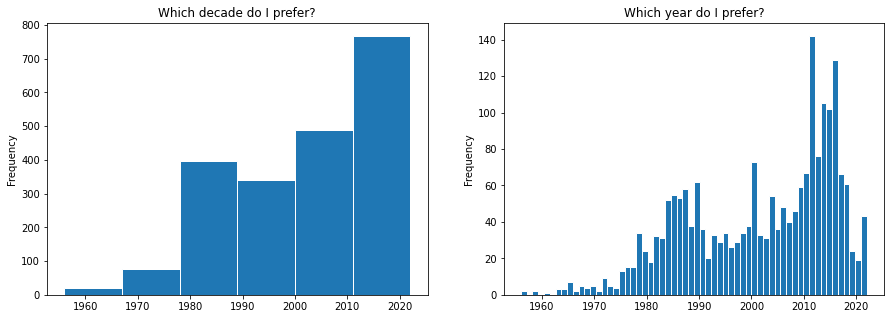

In [14]:
#@title
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(15, 5))
df_hist.drop_duplicates(subset=['artist', 'track_name'], keep='last')['track_year'].\
    plot.hist(bins=6, title='Which decade do I prefer?', ax=axes[0], edgecolor='white');
df_hist.drop_duplicates(subset=['artist', 'track_name'], keep='last')['track_year'].\
    plot.hist(bins=60,title='Which year do I prefer?', ax=axes[1], edgecolor='white');

In [25]:
#@title
%%html
<span style="font-family:Arial Black; font-size:200%;color:RoyalBlue"> Mark Tick Chart</span><br>
<span style="font-family:Arial Black; font-size:200%;color:CornflowerBlue">Track Year Release Distribution</span>
<br>
<br>
<span style="font-family:Arial Black; font-size:100%;color:LightSalmon"> Using Altair</span>

In [27]:
#@title
#axis=alt.Axis(values=np.array(range(1956, 2023)), 
alt.Chart(df_hist).mark_tick().encode(
    alt.X('track_year', title='Tick Marks for track distribution over the years', scale=alt.Scale(zero=False))
).properties(
    width=800,
    height=50
).interactive()

alt.Chart(...)

In [56]:
#@title
%%html
<span style="font-family:Arial Black; font-size:200%;color:RoyalBlue">Lollipop Charts</span><br>
<span style="font-family:Arial Black; font-size:200%;color:CornflowerBlue">Top 20 Artists</span>
<br>
<br>
<span style="font-family:Arial Black; font-size:100%;color:LightSalmon"> Library: Mathplotlib. Most Frecuently Added Artits</span>

_**data-to-viz.com:** <br>
Even if the most common way to represent **one numeric and one categoric**_ variable is probably to use barplots, lollipop can be a very good alternative, especially if you have a high number of entities. It is basically the same thing, but the bar is replaced by a line and a dot at the end. It allows the figure to be less cluttered.

Moreover, it is a good practice to plot a horizontal version, to make the labels more easily readable. Last, sorting your entities gives much more insight to the plot.

https://www.analyticsvidhya.com/blog/2021/06/lollipop-charts-advanced-data-visualization-in-python/<br>
https://www.python-graph-gallery.com/182-vertical-lollipop-plot

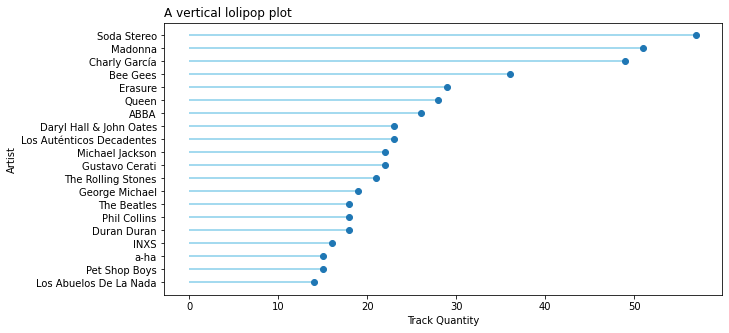

In [32]:
#@title
df_gb = pd.DataFrame(data=df_pl.groupby('artist').track_name.count())
df_gb.reset_index()
df_gb = df_gb.sort_values(by='track_name', ascending=False).reset_index()
df_gb.rename(columns={'track_name':'count'}, inplace=True)

# Reorder it based on the values
df_top_20 = df_gb[df_gb.index<20].sort_values(by='count')
my_range=range(1,len(df_gb[df_gb.index<20].index)+1)

plt.figure(figsize=(10,5))
# The horizontal plot is made using the hline function
plt.hlines(y=my_range, xmin=0, xmax=df_top_20['count'], color='skyblue')
plt.plot(df_top_20['count'], my_range, "o")
 
# Add titles and axis names
plt.yticks(my_range, df_top_20['artist'])
plt.title("A vertical lolipop plot", loc='left')
plt.xlabel('Track Quantity')
plt.ylabel('Artist')

# Show the plot
plt.show()

In [37]:
#@title
%%html
<span style="font-family:Arial Black; font-size:200%;color:RoyalBlue">WordCloud</span><br>
<span style="font-family:Arial Black; font-size:150%;color:CornflowerBlue">Most Frecuent Tracks (Top 20 Artists) </span>
<br>
<br>
<span style="font-family:Arial Black; font-size:100%;color:LightSalmon"> Conclution: WordCloud is not working Ok.</span>

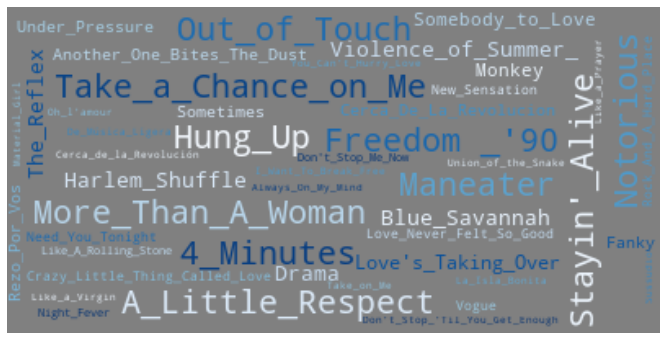

In [36]:
#@title
df_aux = df_hist.copy()
df_aux = df_aux[df_aux.artist.isin(df_top_20.artist.tolist())]
df_aux.track_name = df_aux.apply(lambda x: 
                    x.track_name if '-' not in x.track_name else x.track_name[:x.track_name.find('-')], axis=1)
df_aux.track_name = df_aux.apply(lambda x: 
                    x.track_name if '(feat' not in x.track_name else x.track_name[:x.track_name.find('(feat')], axis=1)
df_aux.track_name = df_aux.apply(lambda x: 
                    x.track_name if '(Original' not in x.track_name else x.track_name[:x.track_name.find('(Original')], axis=1)
stop_words = ['_feat', 'feat', '_Radio_Edit', '_Original_Mix', '_Remasterizado_2007', '_Remix', '_Remastered'
              , '_Original', 'En_Vivo', '_2', 'Remix', '_']
text = ' '.join(['_'.join(word.split()) for word in df_aux.track_name.to_list()])
word_cloud = WordCloud(stopwords=stop_words, min_font_size=6, max_font_size=20, max_words=80
                       , prefer_horizontal=0.7
                       , background_color="grey"
                       , colormap="Blues"
                      , relative_scaling=1).generate(text)
plt.figure(figsize=(15, 6))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [55]:
#@title
%%html
<span style="font-family:Arial Black; font-size:200%;color:RoyalBlue">Ridgeline/Joyplot </span><br>
<span style="font-family:Arial Black; font-size:150%;color:CornflowerBlue">Popularity Distribution of Playlists Over the Years </span><br>
<br>
A Ridgeline plot (sometimes called Joyplot) shows the distribution of a numeric value for several groups. Distribution can be represented using histograms or density plots, all aligned to the same horizontal scale and presented with a slight overlap. https://www.data-to-viz.com/graph/ridgeline.html<br>
Source: https://www.python-graph-gallery.com/ridgeline-graph-seaborn<br>

https://seaborn.pydata.org/examples/kde_ridgeplot.html<br>
<br>
<span style="font-family:Arial Black; font-size:100%;color:LightSalmon"> Library: Seaborn. Each song has an indicator of Popularity in Spotify. It seems in 2022 I added songs more "popular".</span>

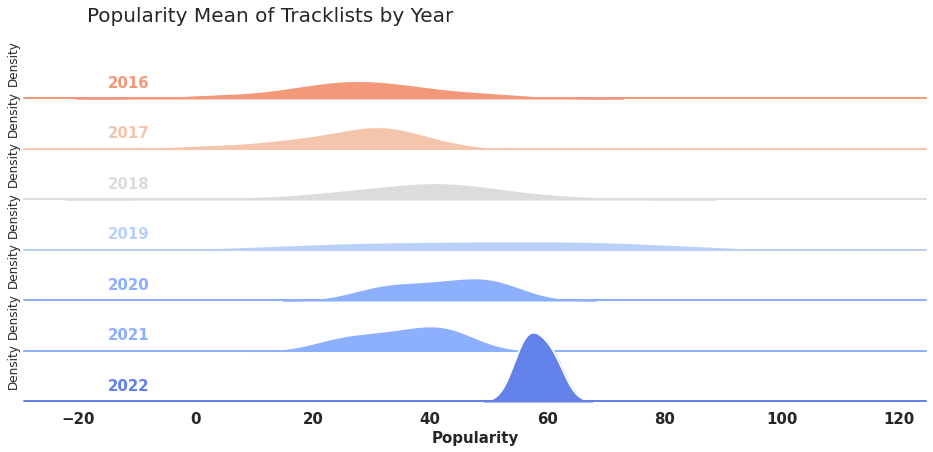

In [45]:
#@title
df_pl['playlist_month'] = pd.to_datetime(df_pl.playlist_date.dt.year.astype(str) + '-' +
                                         df_pl.playlist_date.dt.month.astype(str).str.zfill(2) + 
                                         '-01', format='%Y-%m-%d')
df_pl['playlist_m'] = df_pl.playlist_date.dt.month.astype(str).str.zfill(2)
df_pl['playlist_mo'] = df_pl.playlist_date.dt.month
df_pl['playlist_year'] = df_pl.playlist_date.dt.year
# Playlists quantity by month --> density
df_pls = df_pl.groupby(['playlist_name', 'playlist_date', 'playlist_year', 'playlist_month', 'playlist_mo'
                        , 'playlist_m']).agg(count=('playlist_name', 'count')
                                        , popularity=('popularity', 'mean')
                                        , danceability=('danceability', 'mean')
                                         , energy=('energy', 'mean')
                                         , tempo=('tempo', 'mean'))
df_pls.reset_index(inplace=True)
# we generate a pd.Serie with the count of songs for each year (used later for colors in the FacetGrid plot)
#, and we create a new column on the dataframe
year_count_serie = df_pls.drop_duplicates(subset=['playlist_name']).groupby('playlist_year')['playlist_name'].count()
df_pls['year_count'] = df_pls['playlist_year'].map(year_count_serie)
# we generate a color palette with Seaborn.color_palette()
pal = sns.color_palette(palette='coolwarm', n_colors=7)
# in the sns.FacetGrid class, the 'hue' argument is the one that is the one that 
#will be represented by colors with 'palette'
ordered_years = df_pls.playlist_year.value_counts().index
g = sns.FacetGrid(df_pls, row='playlist_year', row_order=ordered_years, hue='year_count'
                  , aspect=15, height=0.9, palette=pal)#, xlim=(0, 12))
# then we add the densities kdeplots for each month
#g.map(sns.kdeplot, x='popularity',
g.map(sns.kdeplot, "popularity",
      bw_adjust=1, clip_on=False,
      fill=True, alpha=1, linewidth=1.5);
#here we add a white line that represents the contour of each kdeplot
g.map(sns.kdeplot, 'popularity', 
      bw_adjust=1, clip_on=False, 
      color="w", lw=2);
# here we add a horizontal line for each plot
g.map(plt.axhline, y=0,
      lw=2, clip_on=False);
# we loop over the FacetGrid figure axes (g.axes.flat) and add the month as text with the right color
# notice how ax.lines[-1].get_color() enables you to access the last line's color in each matplotlib.Axes
years = df_pls.playlist_year.unique().tolist()
years.sort()
for i, ax in enumerate(g.axes.flat):
    ax.text(-15, 0.02, years[i],
            fontweight='bold', fontsize=15,
            color=ax.lines[-1].get_color());
# we use matplotlib.Figure.subplots_adjust() function to get the subplots to overlap
g.fig.subplots_adjust(hspace=-0.3)

# eventually we remove axes titles, yticks and spines
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True);
plt.setp(ax.get_xticklabels(), fontsize=15, fontweight='bold')
plt.xlabel('Popularity', fontweight='bold', fontsize=15)
g.fig.suptitle('Popularity Mean of Tracklists by Year',
               ha='right',
               fontsize=20,
               fontweight=20)

plt.show()

In [47]:
#@title
%%html
<span style="font-family:Arial Black; font-size:150%;color:CornflowerBlue">Distribution of Playlists per month (Q) Over the Years </span><br>
<br>
<span style="font-family:Arial Black; font-size:100%;color:LightSalmon">Quantity of Playlists per month (Q) Over the Years </span><br>

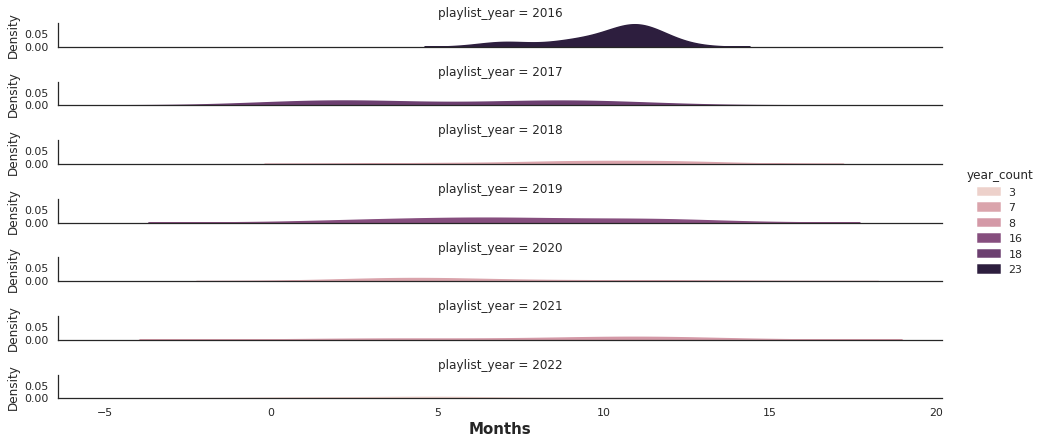

In [48]:
#@title
g = sns.displot(data=df_pls, x="playlist_mo", hue="year_count", row="playlist_year", kind="kde", aspect=15, height=0.9
            , fill=True, alpha=1, linewidth=1.5);
plt.setp(ax.get_xticklabels(), fontsize=15, fontweight='bold')
plt.xlabel('Months', fontweight='bold', fontsize=15)
plt.show()

In [54]:
#@title
%%html
<span style="font-family:Arial Black; font-size:200%;color:RoyalBlue">Interactive Treemap</span><br>
<span style="font-family:Arial Black; font-size:150%;color:CornflowerBlue">Popularity by Track and Artist</span><br>
<br>
A Treemap displays hierarchical data as a set of nested rectangles. Each group is represented by a rectangle, which area is proportional to its value. Using color schemes, it is possible to represent several dimensions: groups, subgroups etc.<br>
https://www.python-graph-gallery.com/treemap/
<br>
<br>
<span style="font-family:Arial Black; font-size:100%;color:LightSalmon">Library: Ploty. Filter: Artists with 8 to 15 songs.</span><br>

In [53]:
#@title
df_artists = df_pl[df_pl.popularity>0].groupby(['artist']).agg(count=('track_name', 'count')
                                        , popularity=('popularity', 'mean')
                                        , danceability=('danceability', 'mean')
                                         , energy=('energy', 'mean')
                                         , tempo=('tempo', 'mean'))
df_artists.reset_index(inplace=True)
df_a = df_artists[(df_artists['count']>8) & (df_artists['count']<=15)]
df_t = df_pl[df_pl.artist.isin(df_a.artist.tolist())][['artist', 'track_name', 'popularity']]
values = df_a.popularity.tolist()
values.extend(df_t.popularity.tolist())
labels = df_a.artist.tolist()
labels.extend(df_t.track_name.tolist())
parents = ['Spotify' for artist in df_a.artist.to_list()]
parents.extend(df_t.artist.tolist())
fig = go.Figure(go.Treemap(
    labels = labels,
    values = values,
    parents = parents,
    textinfo = "label+value+percent parent+percent root",
    marker_colorscale = 'Greens'
))

fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))

fig.show()

In [61]:
#@title
%%html
<span style="font-family:Arial Black; font-size:200%;color:RoyalBlue">Interactive Parallel Coordinates</span><br>
<span style="font-family:Arial Black; font-size:150%;color:CornflowerBlue">Features by Track</span><br>
Parallel plot or Parallel Coordinates plot allows to compare the feature of several individual observations on a set of numeric variables. Each vertical bar represents a variable and usually has its own scale. (The units can even be different). Values are then plotted as series of lines connected across each axis.

Parallel plot is the equivalent of a spider chart, but with cartesian coordinates. 

Its strength is that the variables can even be completely different: different ranges and even different units.

https://plotly.com/python/parallel-coordinates-plot/
<br>
<br>
<span style="font-family:Arial Black; font-size:100%;color:LightSalmon">Library: Ploty Express. Filter: Songs with Popularity > 60.</span><br>
<br>
<span style="font-family:Arial Black; font-size:150%;color:DarkRed">Hubiera estado bueno también poder incluir una variable categórica (clave).</span><br>

In [58]:
#@title
df_pc = df_hist[df_hist.popularity>60][['artist', 'track_name', 'popularity', 'danceability', 'energy', 'tempo']]
# Ploty colorscales https://plotly.com/python/colorscales/ color_continuous_scale=["red", "green", "blue"]
fig = go.Figure(data=
    go.Parcoords(
        line = dict(color = df_pc.tempo,
                   colorscale = 'Electric'
                   , showscale = True),
        dimensions = list([
            dict(range = [0, df_pc.popularity.max()],
                constraintrange = [df_pc.popularity.min(), df_pc.popularity.max()],
                label = 'Popularity', values = df_pc['popularity']),
            dict(range = [0,1],
                label = 'Danceability', values = df_pc['danceability']),
            dict(range = [0,1],
                label = 'Energy', values = df_pc['energy']),
            dict(range = [0,200],
                label = 'Tempo', values = df_pc['tempo'])
        ])
    )
)

fig.update_layout(
    plot_bgcolor = 'white',
    paper_bgcolor = 'white'
)

fig.show()